# Notebook ICD - 18.19

Libraries

In [3]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from numpy import mean
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Conjunto de Datos

**Contexto:** Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir, basándose en mediciones diagnósticas, si un paciente tiene diabetes.

**Contenido:** Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todas las pacientes son mujeres de al menos 21 años de edad de ascendencia indígena Pima.

- **Pregnancies:** Número de veces que ha estado embarazada.
- **Glucose:** Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral.
- **BloodPressure:** Presión arterial diastólica (mm Hg).
- **SkinThickness:** Grosor del pliegue cutáneo del tríceps (mm).
- **Insulin:** Insulina sérica a las 2 horas (mu U/ml).
- **BMI:** Índice de masa corporal (peso en kg/(altura en m)²).
- **DiabetesPedigreeFunction:** Función de pedigree para diabetes.
- **Age:** Edad (años).
- **Outcome:** Variable de clase (0 o 1), donde 1 indica diabetes y 0 indica ausencia de diabetes. 

Este conjunto de datos es ampliamente utilizado en la investigación sobre la diabetes y sirve como un buen ejemplo para aplicar técnicas de aprendizaje automático y análisis de datos. Si necesitas más información sobre cómo utilizar este conjunto de datos o realizar análisis específicos, no dudes en preguntar.

In [6]:
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X)

# 
Baseline model

In [15]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [17]:
clf_nb = GaussianNB()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_nb.fit(X_train, y_train)
    y_pred = clf_nb.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7699825630206876, 0.710195463049429, 0.8051948051948052, 0.7390952033208712, 0.8023022094980975]
0.7653540488167782


# 
Decision Tree models

In [20]:
clf_ddt = DecisionTreeClassifier()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ddt.fit(X_train, y_train)
    y_pred = clf_ddt.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7026069066533982, 0.7115923292393881, 0.7083516483516483, 0.7353368267073852, 0.7592152117190476]
0.7234205845341736


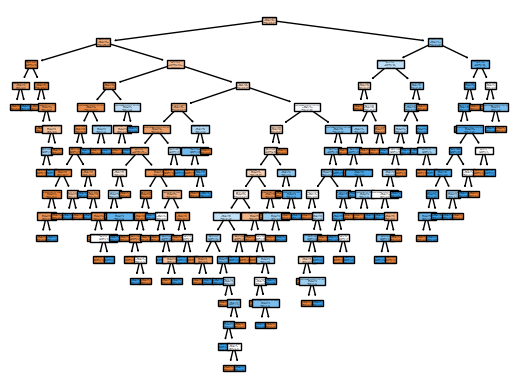

In [22]:
fig = tree.plot_tree(clf_ddt,
                     feature_names = df.columns,
                     class_names = ['False','True'],
                     filled=True)

In [24]:
clf_sdt = DecisionTreeClassifier(max_depth=2)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_sdt.fit(X_train, y_train)
    y_pred = clf_sdt.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.8033584062995828, 0.7052272250510135, 0.7951292023612299, 0.7193267561931156, 0.7170686456400742]
0.7480220471090032


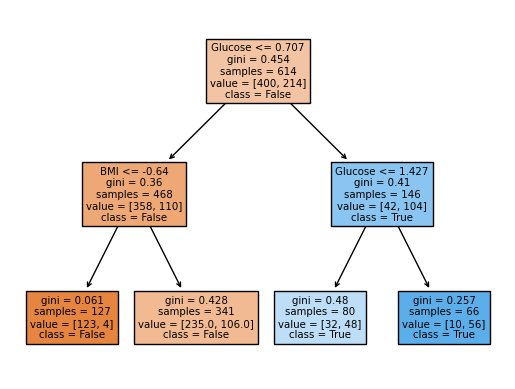

In [26]:
fig = tree.plot_tree(clf_sdt,
                     feature_names = df.columns,
                     class_names = ['False','True'],
                     filled=True)

# **Adaboost**  
El estimador base a partir del cual se construye el conjunto aumentado. Se requiere soporte para el ponderado de muestras, así como los atributos correctos `classes_` y `n_classes_`. Si es None, entonces el estimador base es `DecisionTreeClassifier` inicializado con `max_depth=1`.

Recuerda: los árboles poco profundos tienen menos varianza pero mayor sesgo y, por lo tanto, serán una mejor opción para métodos secuenciales.

In [29]:
clf_ab = AdaBoostClassifier(n_estimators=15, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ab.fit(X_train, y_train)
    y_pred = clf_ab.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7902489667195549, 0.7198515769944341, 0.7792207792207793, 0.7115923292393881, 0.7910711477798209]
0.7583969599907954


C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\and

**Bosque Aleatorio**  
Los valores predeterminados para los parámetros que controlan el tamaño de los árboles (por ejemplo, `max_depth`, `min_samples_leaf`, etc.) conducen a árboles completamente crecidos y sin podar, que pueden ser potencialmente muy grandes en algunos conjuntos de datos. `max_depth`: La profundidad máxima del árbol. Si es None, entonces los nodos se expanden hasta que todas las hojas son puras o hasta que todas las hojas contienen menos de `min_samples_split` muestras.

Las características siempre se permutan aleatoriamente en cada división. Por lo tanto, la mejor división encontrada puede variar, incluso con los mismos datos de entrenamiento, `max_features=n_features` y `bootstrap=False`, si la mejora del criterio es idéntica para varias divisiones enumeradas durante la búsqueda de la mejor división. Para obtener un comportamiento determinista durante el ajuste, `random_state` debe fijarse.

Recuerda: los árboles profundos tienen bajo sesgo pero alta varianza y, por lo tanto, son elecciones relevantes para el bagging.

In [32]:
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7998939835674529, 0.7313771134525852, 0.8083466731766346, 0.7554767899150163, 0.801148851148851]
0.779248682252108
